In [112]:
import pandas as pd
import numpy as np
import math
import re

## Import movie metadata

In [113]:
tsv_file_path = 'data/movie.metadata.tsv'

# Define the column names based on the metadata structure.
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres",
]

# Read the TSV file into a pandas DataFrame and specify that it's tab-separated.
df = pd.read_csv(tsv_file_path, sep='\t', names=column_names, header=None)

# To display the DataFrame:
df


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Extract languages, countries, 

In [114]:
# Function to extract the language names
def extract_language(language_data):
    language_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, language_data)
    for match in matches:
        language_names.append(match[1].split(' ')[0])  # Extract the language name
    return ', '.join(language_names)

# Apply the function to extract language names
df["Movie languages"] = df["Movie languages"].apply(extract_language)


In [115]:
# Function to extract the countries names
def extract_countries(country_data):
    country_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, country_data)
    for match in matches:
        country_names.append(match[1])  # Extract the country name
    return ', '.join(country_names)

# Apply the function to extract country names
df["Movie countries"] = df["Movie countries"].apply(extract_countries)


In [116]:
# Function to extract the genres
def extract_genres(genre_data):
    genre_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, genre_data)
    for match in matches:
        genre_names.append(match[1])  # Extract the genre name
    return ', '.join(genre_names)

# Apply the function to extract genre names
df["Movie genres"] = df["Movie genres"].apply(extract_genres)



In [117]:
# Function to extract the release year from the date
def extract_release_year(date_str):
    try:
        # Attempt to extract the year from the 'YYYY-MM-DD' format
        return pd.to_datetime(date_str).year
    except (ValueError, TypeError):
        try:
            # Attempt to extract the year from 'YYYY' format
            return int(date_str)
        except ValueError:
            return None  # Return None for invalid or missing dates

# Apply the function to the "Movie release date" column to create a new "Release Year" column
df['Release Year'] = df['Movie release date'].apply(extract_release_year)


In [118]:

# Convert 'genres' and 'countries' columns from comma-separated strings to lists
df['Movie genres'] = df['Movie genres'].apply(lambda x: x.split(','))
df['Movie countries'] = df['Movie countries'].apply(lambda x: x.split(','))
df['Movie languages'] = df['Movie languages'].apply(lambda x: x.split(','))


In [119]:
df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventu...",2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English],[United States of America],"[Mystery, Biographical film, Drama, Crime D...",2000.0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian],[Norway],"[Crime Fiction, Drama]",1988.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological th...",1987.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German],[Germany],[Drama],1983.0
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English],[United States of America],[Drama],2011.0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[English],[United States of America],"[Satire, Comedy]",1972.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese],[Japan],"[Science Fiction, Japanese Movies, Adventure...",1992.0


## Import movie plot summaries and text preprocessing

In [120]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
def preprocess_summary(text):
    """
    Tokenize, lemmatize, remove stopwords and punctuations from an input text.
    
    Parameters
    ----------
    text: str, input text
    
    Returns
    -------
    str, preprocessed text
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    
    tokens = nltk.word_tokenize(text)
    text = [word for word in tokens if word not in string.punctuation]
    
    return " ".join([lemmatizer.lemmatize(word.lower()) for word in text if word.lower() not in stop_words])

In [122]:
"""
summaries: dictionary, with movie_id as keys and list of preprocessed words in the summary as values
"""
with open("./data/plot_summaries.txt", encoding='utf-8') as f:
    content = f.readlines()
original_summaries = [x.strip() for x in content] 
summaries = [preprocess_summary(d).split() for d in original_summaries]
summaries = {summary[0]: summary[1:] for summary in summaries}

## Keep only movies with plot summary

In [123]:
# Convert keys of 'summaries' from strings to ints
summaries_int_keys = {int(k): v for k, v in summaries.items()}

# Filter the DataFrame to only include rows where 'Wikipedia movie ID' is a key in the updated 'summaries' dictionary
df_filtered = df[df['Wikipedia movie ID'].isin(summaries_int_keys.keys())]


In [124]:
df_filtered

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventu...",2001.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological th...",1987.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German],[Germany],[Drama],1983.0
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English],[South Africa],"[Family Film, Fantasy, Adventure, World cin...",2002.0
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[English],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-dram...",1997.0
...,...,...,...,...,...,...,...,...,...,...
81733,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,[English],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatu...",1941.0
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English],[United States of America],[Drama],2011.0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese],[Japan],"[Science Fiction, Japanese Movies, Adventure...",1992.0


## Add preprocessed summary to the dataframe

In [125]:
df_filtered['Plot summary'] = df_filtered['Wikipedia movie ID'].map(summaries_int_keys)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
df_filtered

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Plot summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventu...",2001.0,"[set, second, half, 22nd, century, film, depic..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological th...",1987.0,"[series, murder, rich, young, woman, throughou..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German],[Germany],[Drama],1983.0,"[eva, upper, class, housewife, becomes, frustr..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English],[South Africa],"[Family Film, Fantasy, Adventure, World cin...",2002.0,"[every, hundred, year, evil, morgana, return, ..."
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[English],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-dram...",1997.0,"[adam, san, francisco-based, artist, work, cab..."
...,...,...,...,...,...,...,...,...,...,...,...
81733,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,[English],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatu...",1941.0,"[plot, film, open, great, western, express, sp..."
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English],[United States of America],[Drama],2011.0,"[two, former, national, oceanic, atmospheric, ..."
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0,"[plot, film, follows, 12, year, life, 3, irish..."
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese],[Japan],"[Science Fiction, Japanese Movies, Adventure...",1992.0,"[story, take, place, year, 2092, super, dimens..."


## Sentiment analysis

In [127]:
from textblob import TextBlob

In [128]:
# Function to compute sentiment polarity
def compute_sentiment(text_list):
    text = " ".join(text_list)  # Convert list of words to a single string
    return TextBlob(text).sentiment.polarity

# Apply the function to compute sentiment score for each summary
df_filtered['Sentiment score'] = df_filtered['Plot summary'].apply(compute_sentiment)

df_filtered

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Plot summary,Sentiment score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventu...",2001.0,"[set, second, half, 22nd, century, film, depic...",-0.075099
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological th...",1987.0,"[series, murder, rich, young, woman, throughou...",0.039072
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German],[Germany],[Drama],1983.0,"[eva, upper, class, housewife, becomes, frustr...",0.152296
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English],[South Africa],"[Family Film, Fantasy, Adventure, World cin...",2002.0,"[every, hundred, year, evil, morgana, return, ...",-0.036790
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[English],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-dram...",1997.0,"[adam, san, francisco-based, artist, work, cab...",0.162716
...,...,...,...,...,...,...,...,...,...,...,...,...
81733,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,[English],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatu...",1941.0,"[plot, film, open, great, western, express, sp...",-0.052381
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English],[United States of America],[Drama],2011.0,"[two, former, national, oceanic, atmospheric, ...",0.095833
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,[English],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0,"[plot, film, follows, 12, year, life, 3, irish...",0.010000
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese],[Japan],"[Science Fiction, Japanese Movies, Adventure...",1992.0,"[story, take, place, year, 2092, super, dimens...",0.185669


## Some plots

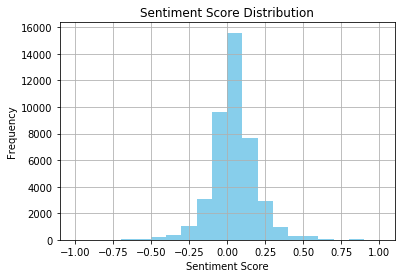

In [129]:
import matplotlib.pyplot as plt

plt.hist(df_filtered["Sentiment score"], bins=20, color='skyblue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()


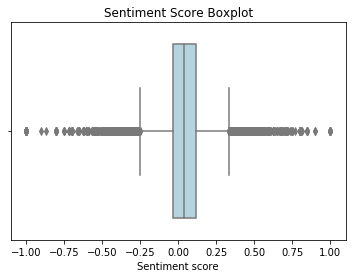

In [130]:
import seaborn as sns

sns.boxplot(data=df_filtered, x="Sentiment score", color='lightblue')
plt.title("Sentiment Score Boxplot")
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


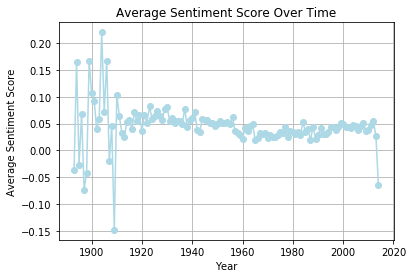

In [131]:

# Calculate the average sentiment score by year
time_sentiment = df_filtered.groupby(df_filtered["Release Year"])["Sentiment score"].mean()

plt.plot(time_sentiment.index, time_sentiment, marker='o', color='lightblue')
plt.title("Average Sentiment Score Over Time")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.grid()
plt.show()


In [132]:
# Explode the DataFrame so each genre has its own row along with the sentiment score.
df_exploded = df_filtered.explode('Movie genres')


In [133]:
df_exploded

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Plot summary,Sentiment score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],Thriller,2001.0,"[set, second, half, 22nd, century, film, depic...",-0.075099
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],Science Fiction,2001.0,"[set, second, half, 22nd, century, film, depic...",-0.075099
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],Horror,2001.0,"[set, second, half, 22nd, century, film, depic...",-0.075099
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],Adventure,2001.0,"[set, second, half, 22nd, century, film, depic...",-0.075099
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English],[United States of America],Supernatural,2001.0,"[set, second, half, 22nd, century, film, depic...",-0.075099
...,...,...,...,...,...,...,...,...,...,...,...,...
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[Japanese],[Japan],Drama,1992.0,"[story, take, place, year, 2092, super, dimens...",0.185669
81740,12476867,/m/02w7zz8,Spliced,2002,NaN,86.0,[English],[Canada],Thriller,2002.0,"[movie, teenage, girl, love, horror, movie, wa...",0.083636
81740,12476867,/m/02w7zz8,Spliced,2002,NaN,86.0,[English],[Canada],Horror,2002.0,"[movie, teenage, girl, love, horror, movie, wa...",0.083636
81740,12476867,/m/02w7zz8,Spliced,2002,NaN,86.0,[English],[Canada],Slasher,2002.0,"[movie, teenage, girl, love, horror, movie, wa...",0.083636


In [134]:
# Now, group by 'genres' and compute the average sentiment score.
genre_sentiment = df_exploded.groupby('Movie genres')['Sentiment score'].mean().reset_index()


In [135]:
genre_sentiment

,Movie genres,Sentiment score
0,,0.066064
1,Absurdism,0.058013
2,Acid western,0.007064
3,Action,0.010065
4,Action Comedy,0.020613
...,...,...
616,Western,0.042594
617,Workplace Comedy,0.074278
618,World cinema,0.078379
619,Wuxia,0.008339


In [136]:
# Calculate the frequencies of each genre
genre_counts = df_exploded['Movie genres'].value_counts()

# Determine a threshold based on a quantile
threshold = genre_counts.quantile(0.75)  # This will give us the top 25% most frequent genres

# Select the genres that meet or exceed the threshold
relevant_genres = genre_counts[genre_counts >= threshold].index.tolist()

# Filter the exploded DataFrame to only include relevant genres
df_relevant_genres = df_exploded[df_exploded['Movie genres'].isin(relevant_genres)]

# Group by 'genres' again and compute the average sentiment score for the relevant genres
relevant_genre_sentiment = df_relevant_genres.groupby('Movie genres')['Sentiment score'].mean().reset_index()

relevant_genre_data = pd.DataFrame({
    'Genre': relevant_genres,
    'Average Sentiment Score': relevant_genre_sentiment['Sentiment score']
})

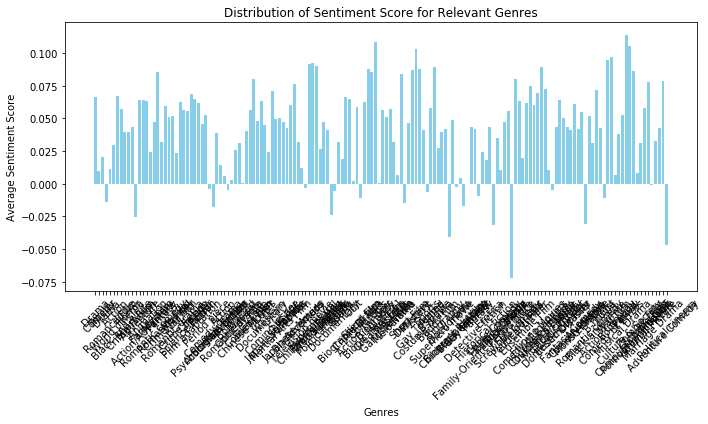

,Genre,Average Sentiment Score
0,Drama,0.066064
1,Comedy,0.010065
2,Thriller,0.020613
3,Drama,-0.013766
4,Romance Film,0.011162
...,...,...
151,Marriage Drama,-0.001287
152,Monster,0.032654
153,LGBT,0.042594
154,Adventure Comedy,0.078379


In [137]:
# Plot the distribution for relevant genres
plt.figure(figsize=(10, 6))
plt.bar(relevant_genre_data['Genre'], relevant_genre_data['Average Sentiment Score'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Sentiment Score')
plt.title('Distribution of Sentiment Score for Relevant Genres')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to accommodate the genre labels
plt.show()

relevant_genre_data  # Display the DataFrame containing the relevant genres and their average sentiment scores